## Tipos de análisis
- Analisis univariante: describir y resumir datos de una variable, valores atipicos, modas, medianas, patrones del conjunto. 
- Analisis bivariante: entender como se relacionan dos variables
- Analisis multivariante: relaciones entre 3 o mas variables


### Hoja de ruta

Depender del tipo de variable
- Variables numéricas
    - Analisis univariable: 
      - Histograma
      - Diagrama de cajas: Boxplot, ViolinPlot
      - Descriptivo
    - Anális bivariable: 
      - Gráfico de Dispersión (scatterplot)
      - Regresión (reg plot)
      - Coeficientes de correlación
  - 

- Variables categóricas


In [4]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [5]:
df = pd.read_csv("./files/bank-additional-clean-nonulls.csv") 
df['marital'] = df['marital'].replace({'noviembre': 'married'})

In [6]:
df.head()

,Unnamed: 0,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,age,euribor3m,pdays
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,40.005436,4.857000,4.4
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,noviembre,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,57.000000,3.603174,4.8
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,services,married,high school,No,Si,No,telephone,226,1,0,nonexistent,1.1,93.994,-36.4,5191,no,15-febrero-2019,34.939,-94.847,febrero,2019.0,Adultos jóvenes,37.000000,4.857000,7.0
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,admin.,married,basic 6y,No,No,No,telephone,151,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-noviembre-2015,49.041,-70.308,noviembre,2015.0,Mediana edad,40.000000,3.595488,2.8
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,services,married,high school,No,No,Si,telephone,307,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-enero-2017,38.033,-104.463,enero,2017.0,Mediana edad,56.000000,3.602722,5.8


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,43000.0,21499.500000,12413.175124,0.000000,10749.75000,21499.500000,32249.25000,42999.000000
income,43000.0,93241.200070,50498.316182,5841.000000,49610.00000,93050.500000,136744.50000,180802.000000
kidhome,43000.0,1.004791,0.815913,0.000000,0.00000,1.000000,2.00000,2.000000
teenhome,43000.0,0.998605,0.815983,0.000000,0.00000,1.000000,2.00000,2.000000
numwebvisitsmonth,43000.0,16.589698,9.239205,1.000000,9.00000,17.000000,25.00000,32.000000
duration,43000.0,257.739279,258.666033,0.000000,102.00000,179.000000,319.00000,4918.000000
campaign,43000.0,2.567233,2.772294,1.000000,1.00000,2.000000,3.00000,56.000000
previous,43000.0,0.174023,0.497366,0.000000,0.00000,0.000000,0.00000,7.000000
empvarrate,43000.0,0.077128,1.573898,-3.400000,-1.80000,1.100000,1.40000,1.400000
conspriceidx,43000.0,93.574219,0.576365,92.201000,93.07500,93.574219,93.99400,94.767000


## Visualización Variables Numéricas




### Análisis Univariable - Histogramas

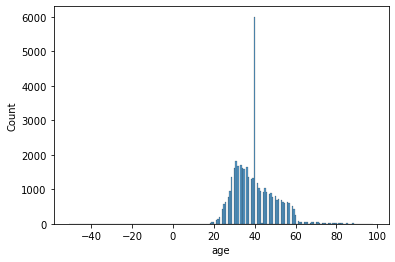

In [12]:
sns.histplot(x="age", data = df);

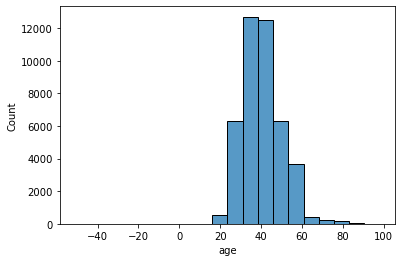

In [13]:
sns.histplot(x="age", data = df, bins= 20);

In [ ]:
sns.histplot?


Text(0, 0.5, 'Frecuencia')

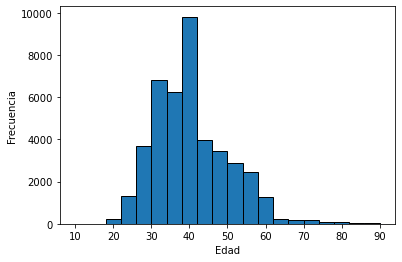

In [17]:
## con matplot 
plt.hist(x= "age", data=df, bins=20, range=[10,90], edgecolor= "black"); 
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

In [ ]:
sns.histplot?

### Análisis Univariable - Boxplot

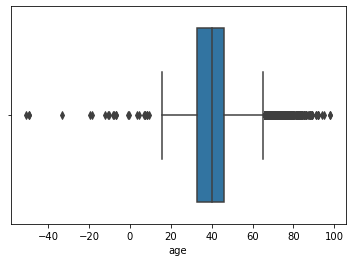

In [22]:
sns.boxplot(x= "age", data= df); 

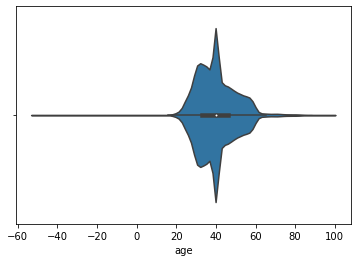

In [23]:
### Análisis Univariable - ViolinPLot

sns.violinplot(x= "age", data= df); 


![boxplot](https://github.com/Adalab/data_imagenes/blob/main/Modulo-3/boxplot.png?raw=true)


  - Los elementos principales de un boxplot son la caja, la mediana, los bigotes y los outliers.
    - La mediana muestra el valor central de los datos.
    - La caja muestra cómo están distribuidos el 50% central de los datos.
    - Los bigotes muestran la extensión de los datos dentro de un rango razonable.
    - Los outliers son valores inusuales que pueden necesitar más análisis.
  - Un boxplot ayuda a entender la distribución, la dispersión y la presencia de valores atípicos en los datos.

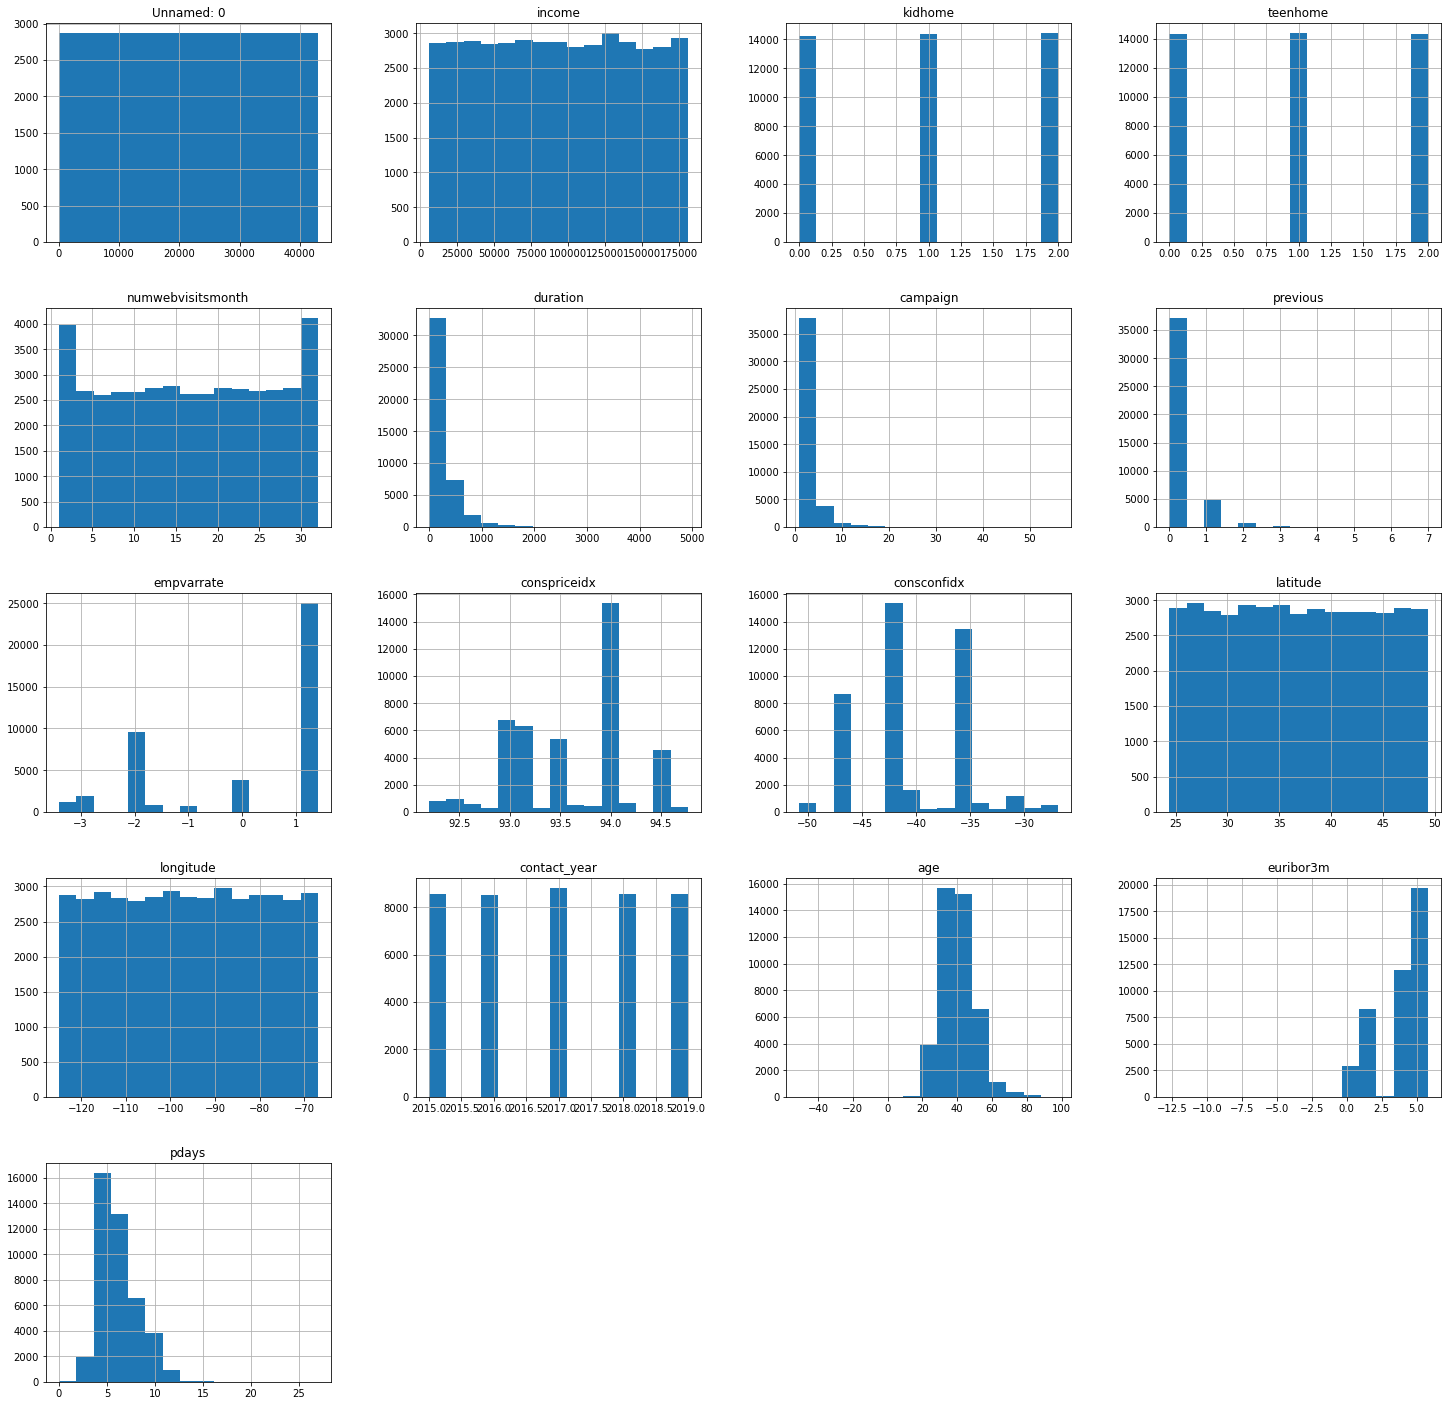

In [25]:
df.hist(bins= 15, figsize=(25,25)); 
plt.savefig("histogramas_df")



### Análisis Univariable - Descriptivos



### Análisis Bivariable - Scatter plot (diagrama de dispersión)

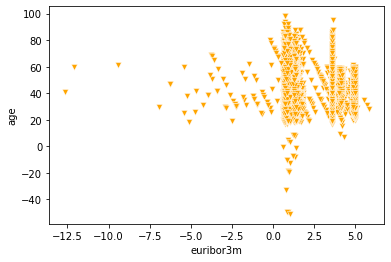

In [30]:
sns.scatterplot(x="euribor3m", y="age", data=df, marker="v", color="orange");

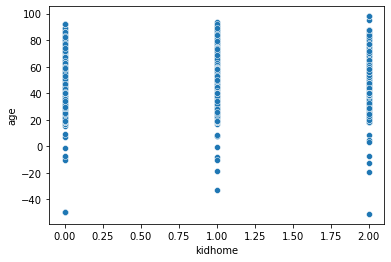

In [28]:
sns.scatterplot(x="kidhome", y="age", data=df);

### Análisis Bivariable - Reg plot



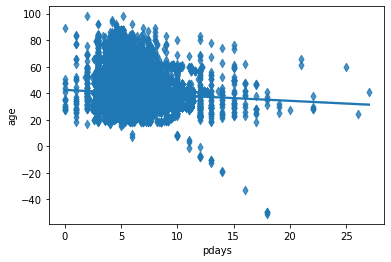

In [32]:
sns.regplot(x="pdays", y= "age", data=df, marker="d");

### Análisis bivariable - Coeficientes correlación

In [34]:
num_vars= df.select_dtypes(include=np.number).columns.tolist()
matriz_corr = df[num_vars].corr(); 

<AxesSubplot:>

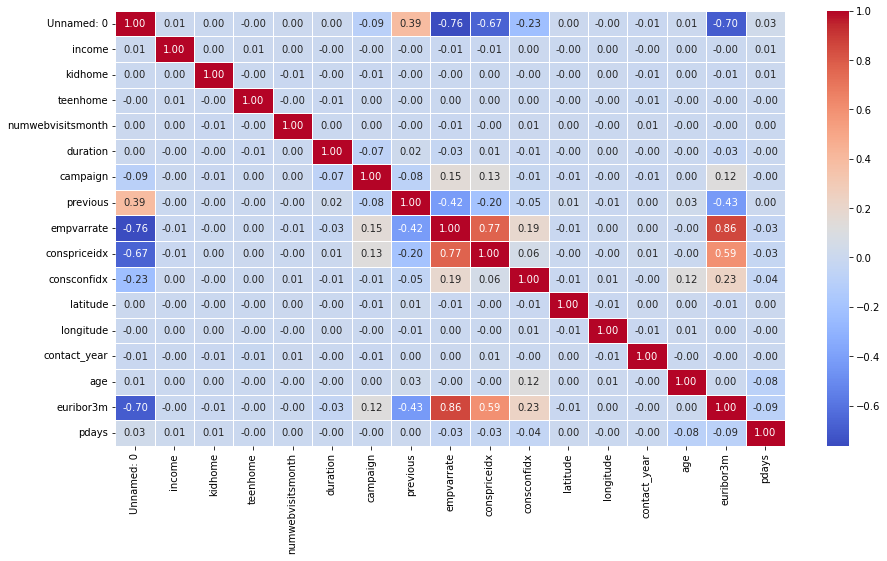

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

### Interpretación del coeficiente

| **Rango del coeficiente** | **Interpretación**                | **Tipo de relación**                |
|---------------------------|-----------------------------------|------------------------------------|
| 1.0                       | Correlación perfecta positiva      | Cuanto más sube una variable, más sube la otra |
| 0.7 a 0.9                 | Correlación positiva fuerte        | Relación positiva clara            |
| 0.4 a 0.6                 | Correlación positiva moderada      | Relación positiva moderada         |
| 0.1 a 0.3                 | Correlación positiva débil         | Relación positiva débil            |
| 0.0                       | Sin correlación                   | No hay relación aparente           |
| -0.1 a -0.3               | Correlación negativa débil         | Relación negativa débil            |
| -0.4 a -0.6               | Correlación negativa moderada      | Relación negativa moderada         |
| -0.7 a -0.9               | Correlación negativa fuerte        | Relación negativa clara            |
| -1.0                      | Correlación perfecta negativa      | Cuanto más sube una vari